In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import pandas as pd
import os
%matplotlib inline

In [2]:
data = pd.read_csv("/home/techfield/class/Homework8_logistic/donut.csv",sep = " ", header = None) 
data

,0,1,2
0,1.693347,-0.618121,0.0
1,0.294613,0.162370,0.0
2,0.806788,-0.114438,0.0
3,1.331376,-1.583038,0.0
4,0.229828,-0.381183,0.0
5,0.329167,0.914235,0.0
6,0.079453,-0.451633,0.0
7,1.236167,-0.998968,0.0
8,-0.848516,-0.903141,0.0
9,0.788228,0.648453,0.0


In [3]:
x = data.iloc[:,0]
y = data.iloc[:,1]


In [4]:
dist = np.sqrt(x**2+y**2)

In [5]:
X = data.drop(2,axis = 1)
X = np.column_stack((np.ones((4000,1)), X))
X = np.column_stack((X,dist))
y = data.iloc[:,2]
X

array([[ 1.        ,  1.69334689, -0.61812147,  1.80263636],
       [ 1.        ,  0.29461306,  0.16237049,  0.33639416],
       [ 1.        ,  0.80678767, -0.1144376 ,  0.81486337],
       ...,
       [ 1.        ,  3.91890768,  0.64919683,  3.97231594],
       [ 1.        ,  5.79835475,  0.32706275,  5.8075716 ],
       [ 1.        ,  4.36411808,  0.09837302,  4.36522667]])

In [6]:
def sigmoid(h):
    return 1/(1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return -np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))

def accuracy(y, p_hat):
    return np.mean(y == np.round(p_hat))

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


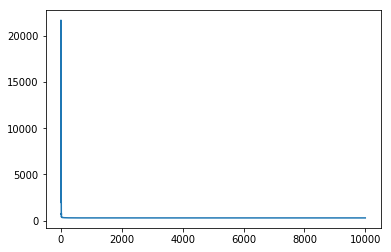

In [7]:
w = np.random.randn(4)


eta = 1e-3
epochs = int(1e4)
J = [0]*epochs

for epoch in range(epochs):
    p_hat = sigmoid(X.dot(w))
    J[epoch] = cross_entropy(y, p_hat)
    w -= eta*X.T.dot(p_hat - y)
    
plt.figure()
plt.plot(J)

In [8]:
p_hat = sigmoid(X.dot(w))

print("Accuracy: {:0.4f}".format(accuracy(y,p_hat)))

Accuracy: 0.9722


In [9]:
w

array([-1.36010978e+01,  1.54499835e-01,  2.05411916e-03,  4.21429827e+00])

I got an accuracy of .9722, so that was pretty good. Now I'm going to try an elipse.

In [10]:
y = data.iloc[:,2]

In [11]:
X_2 = X[:,1]**2
Y_2 = X[:,2]**2
XY = X[:,1] * X[:,2]

In [12]:
data1 = np.column_stack((np.ones((4000,1)), X_2,Y_2,XY))

In [13]:
X = data1

In [14]:
def sigmoid(h):
    return 1/(1 + np.exp(-h))

def cross_entropy(y, p_hat):
    return -np.sum(y*np.log(p_hat) + (1 - y)*np.log(1 - p_hat))

def accuracy(y, p_hat):
    return np.mean(y == np.round(p_hat))

/home/techfield/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


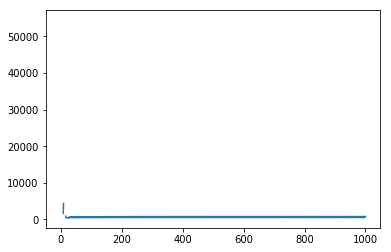

In [15]:
w = np.random.randn(4)

eta = 1e-3
epochs = int(1e3)
J = [0]*epochs

for epoch in range(epochs):
    p_hat = sigmoid(X.dot(w))
    J[epoch] = cross_entropy(y, p_hat)
    w -= eta*X.T.dot(p_hat - y)
    
plt.figure()
plt.plot(J)

In [20]:
w

array([-14.47202808,   1.03982645,   1.14710281,  -0.05706677])

In [17]:
p_hat = sigmoid(X.dot(w))

print("Accuracy: {:0.4f}".format(accuracy(y,p_hat)))

Accuracy: 0.9605


Now, i got a value of .9605 which is not as good, but it was done with the elipse instead of using the radius